In [1]:
import sys  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
import matplotlib as mpl

sys.path.insert(0, '../../')
from mystatlearn.interpolation import CubicSpline

%matplotlib inline
%load_ext autoreload
%autoreload 2
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')
rcParams = {
    'font.family' : 'Latin Modern Math',
    'font.size': 12,
    'axes.linewidth' : 1.5,
    'mathtext.fontset' : 'stix'
}
mpl.rcParams.update(rcParams)

# Natural Cubic Splines

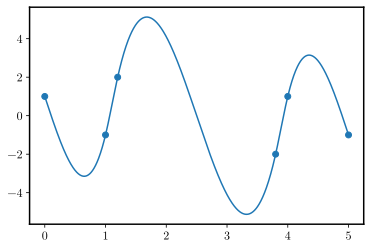

In [8]:
X = np.array([0, 1, 1.2, 3.8, 4, 5]).astype('float32')
y = np.array([1, -1, 2, -2, 1, -1]).astype('float32')

spline = CubicSpline()
spline.fit(X, y)

xs = np.linspace(0, 5, 1000)
y_fit = spline.interpolate(xs)
plt.scatter(X, y)
plt.plot(xs, y_fit)
plt.show()